# Data Analysis

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from src.util import plot_confusion_matrix, plot_train_line, load_train_data, load_train_data_error, cm_score, plot_violin

### EX1: single effect classification

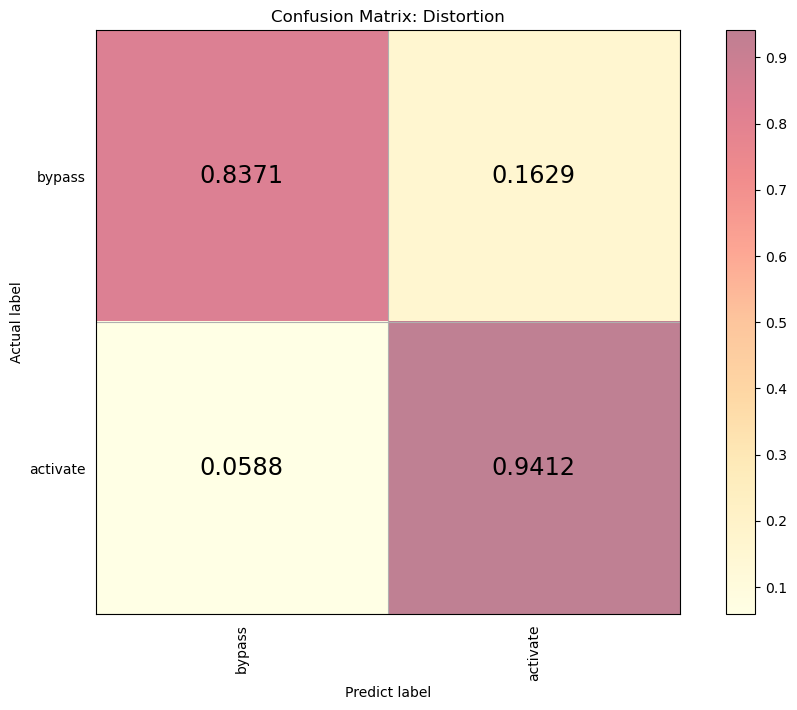

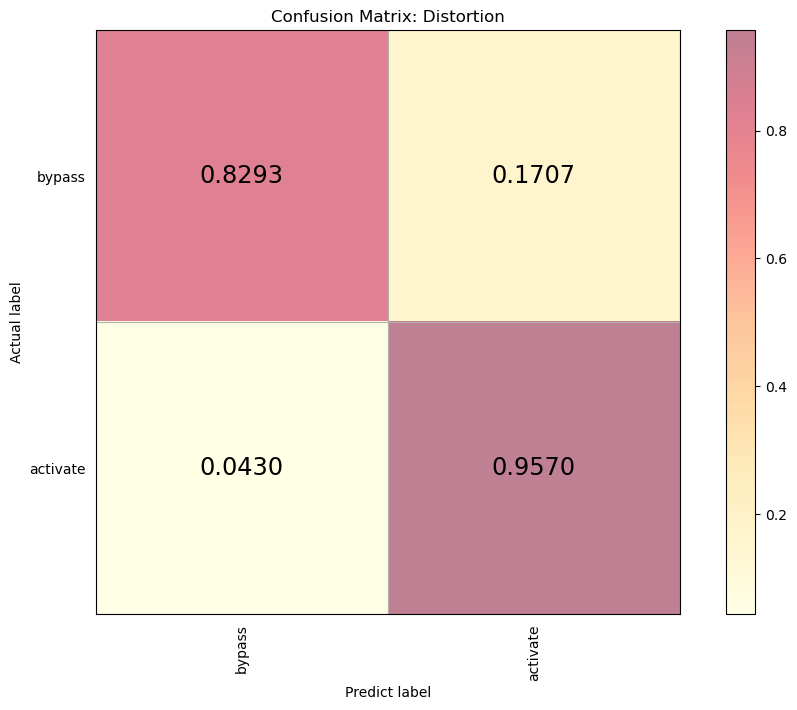

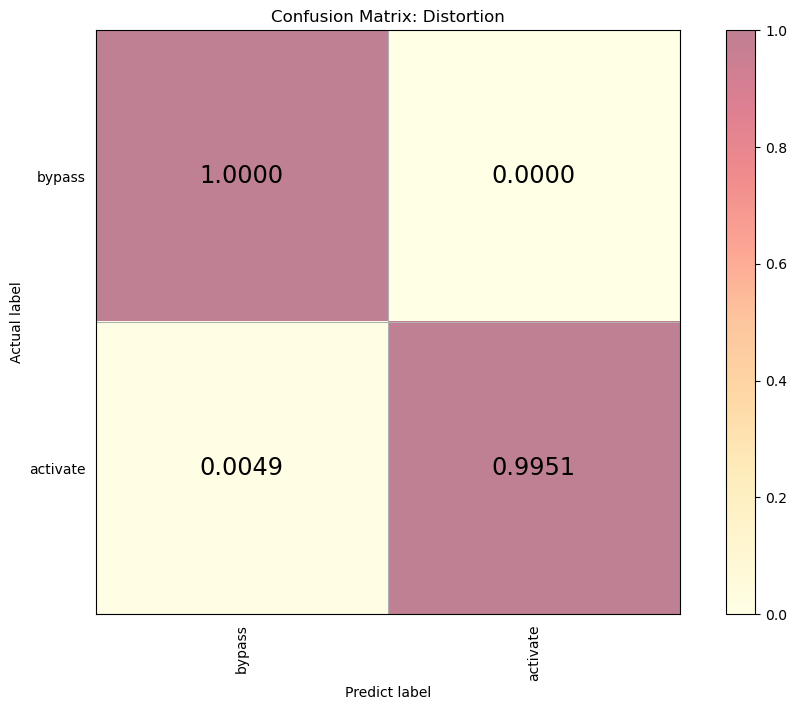

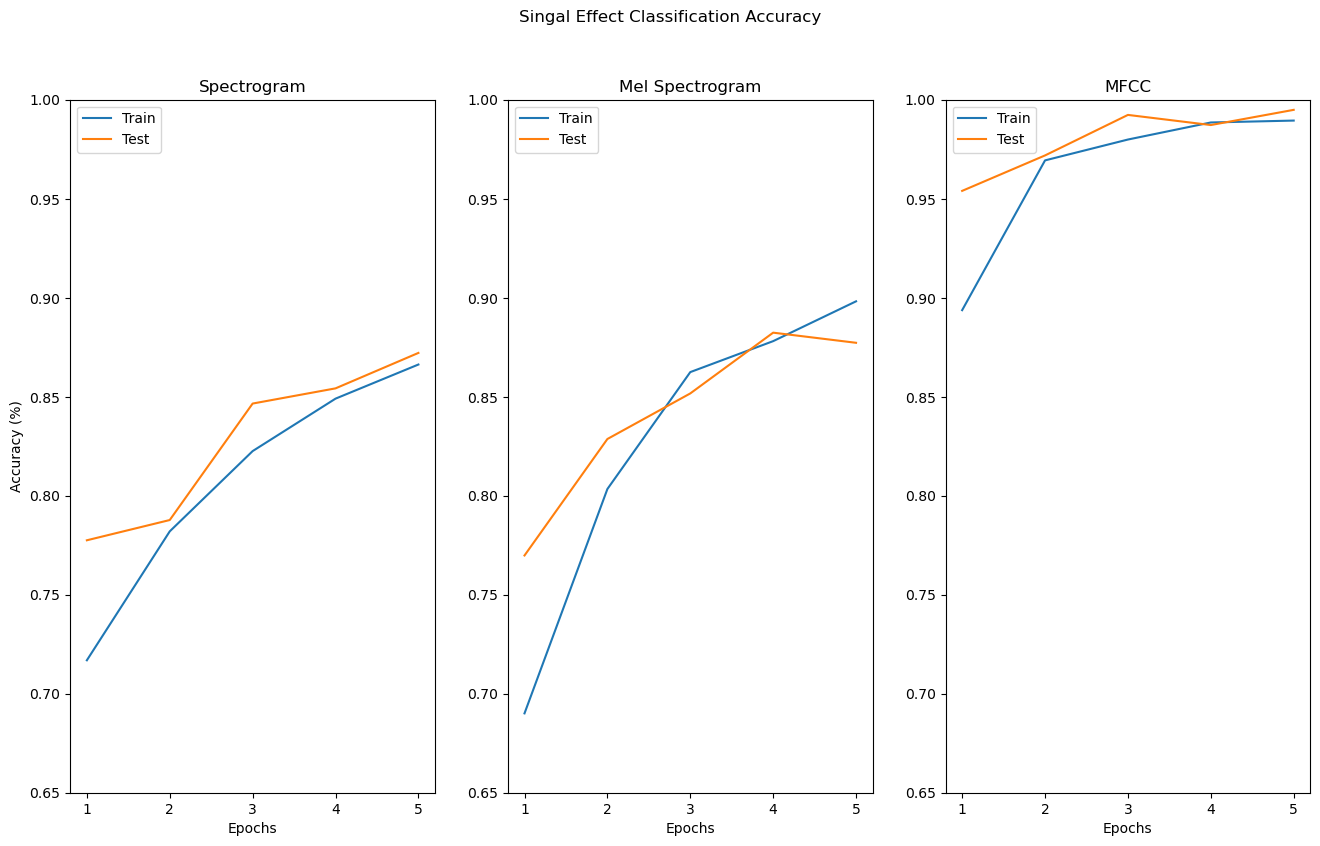

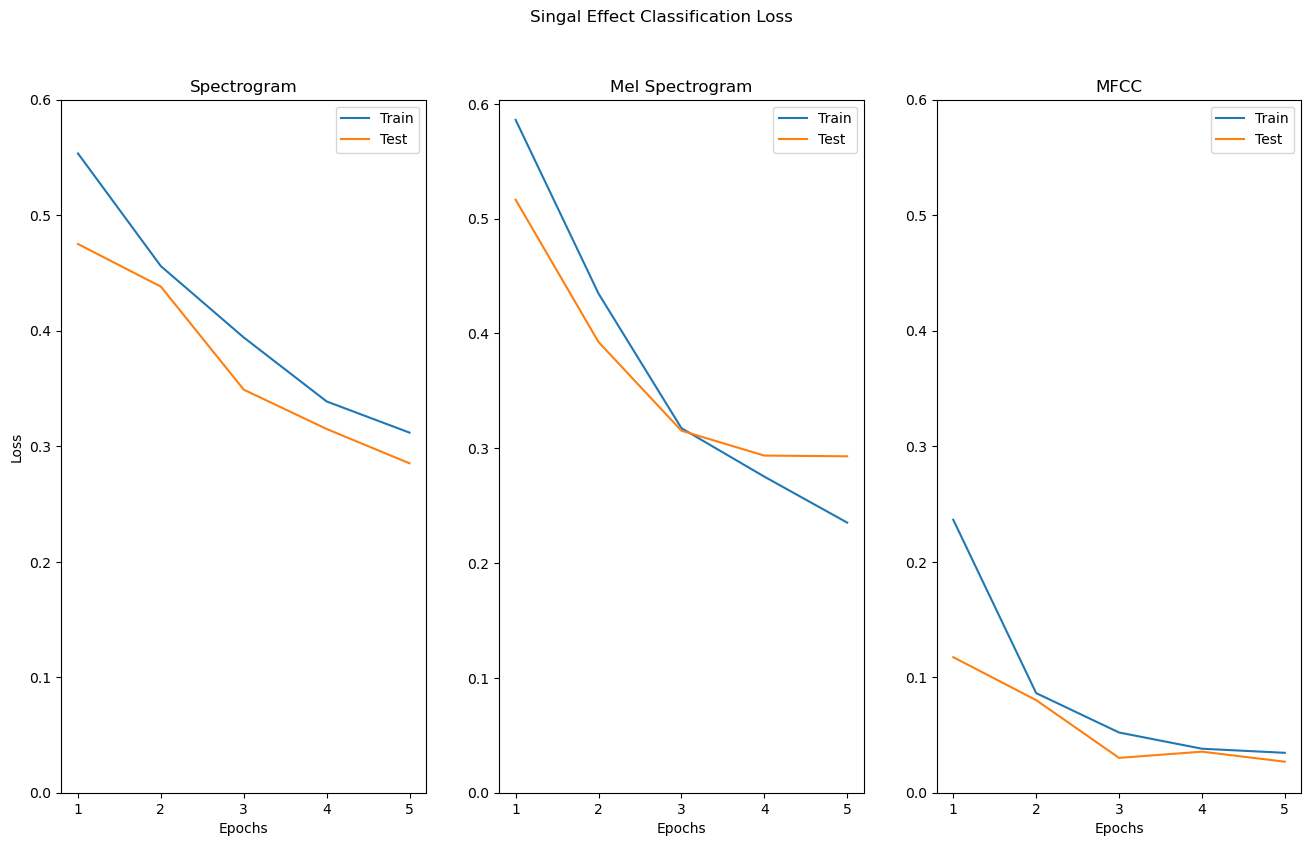

,Accuracy,Precision,Recall,F1_score
Spectrogram,0.8824,0.8163,0.9412,0.8743
Mel Spectrogram,0.8900,0.8357,0.9570,0.8922
MFCC,0.9974,1.0000,0.9951,0.9976


In [2]:
TRAIN_DIR = '_log/Legacy/Training/'
EVUAL_DIR = '_log/Legacy/Evaluation/'
PLOT_DIR = '_log/Legacy/Plot/'

LABELS_ID = ['bypass', 'activate']
NAME_MAP = ['spec', 'mel', 'mfcc']
TRANSFORM_MAP = ['Spectrogram', 'Mel Spectrogram', 'MFCC']
acc_list, loss_list, error_list = [], [], []

for i in range(3):

    acc, loss = load_train_data(TRAIN_DIR + 'c53_classify_od_' + NAME_MAP[i] + '/')
    error = np.load(EVUAL_DIR + 'c53_classify_od_' + NAME_MAP[i] + '_evaluation.npy')

    plot_confusion_matrix(confusion_matrix(y_true=error[0], y_pred=error[1]),
                                        title='Confusion Matrix: Distortion',
                                        classes=LABELS_ID)
    acc_list.append(acc)
    loss_list.append(loss)
    error_list.append(cm_score(error))

plot_train_line(data=acc_list,
                num_subplot=3,
                subtitle="Singal Effect Classification Accuracy",
                title=TRANSFORM_MAP,
                legend_loc='upper left',
                x_label='Epochs',
                y_label='Accuracy (%)',
                x_ticks=np.arange(1, 6, 1), 
                y_ticks=np.arange(0.65, 1.05, 0.05),
                hight=9, 
                width=16)

plot_train_line(data=loss_list,
                num_subplot=3,
                subtitle="Singal Effect Classification Loss",
                title=TRANSFORM_MAP,
                legend_loc='upper right',
                x_label='Epochs',
                y_label='Loss',
                x_ticks=np.arange(1, 6, 1), 
                y_ticks=np.arange(0, 0.7, 0.1),
                hight=9, 
                width=16)

df = pd.DataFrame(error_list,
                  columns = ['Accuracy','Precision','Recall','F1_score'],
                  index = TRANSFORM_MAP)
df

### EX2: Effect Classification

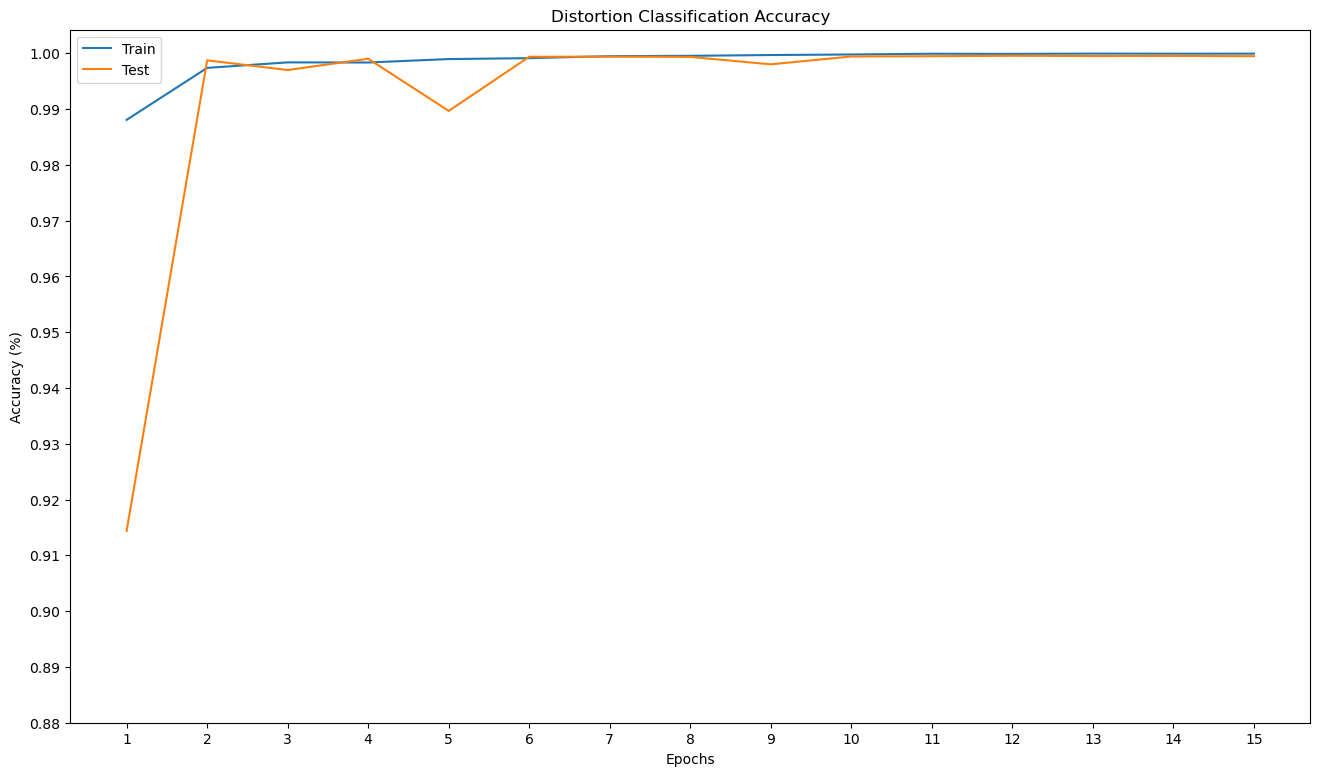

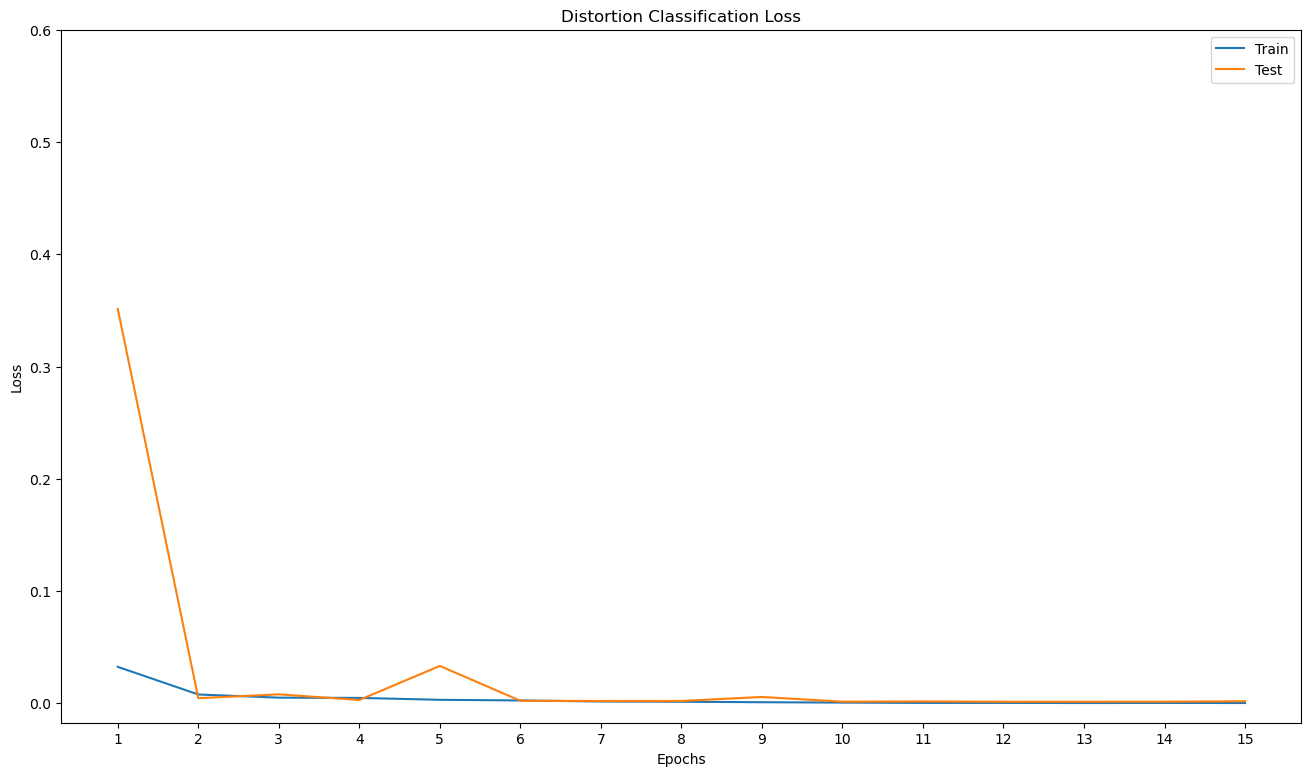

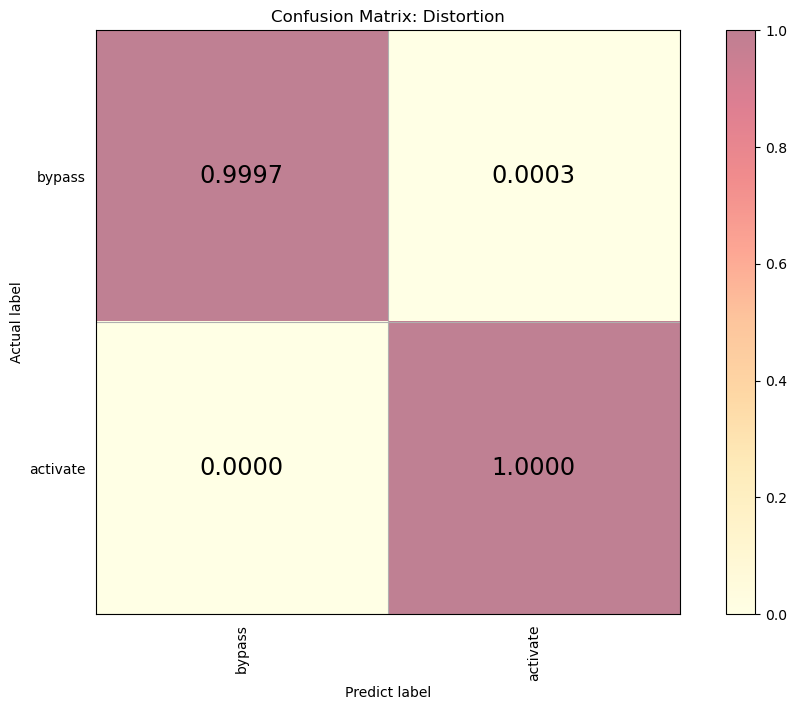

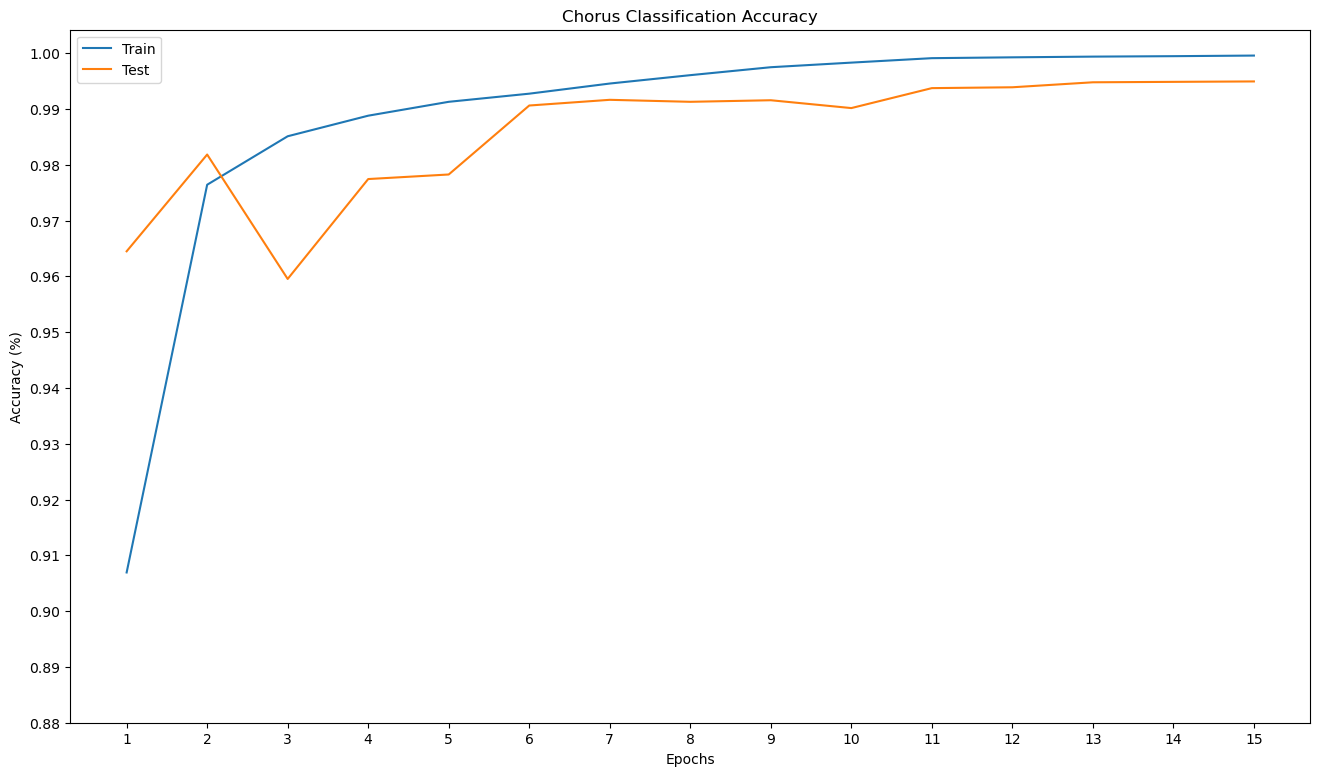

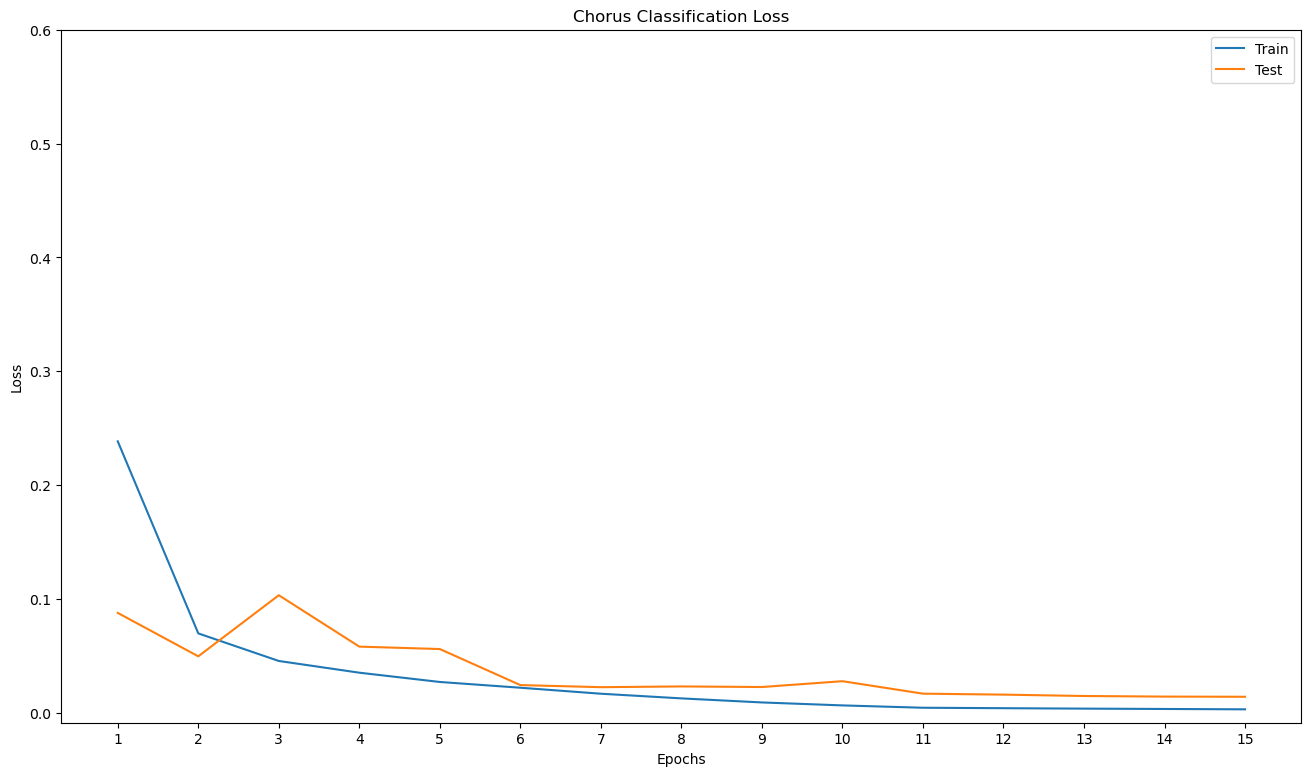

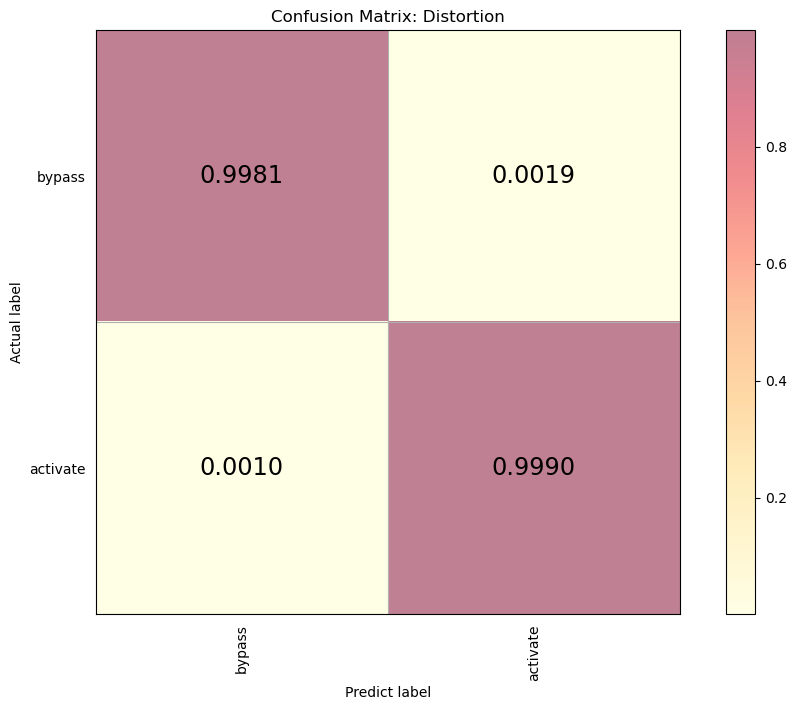

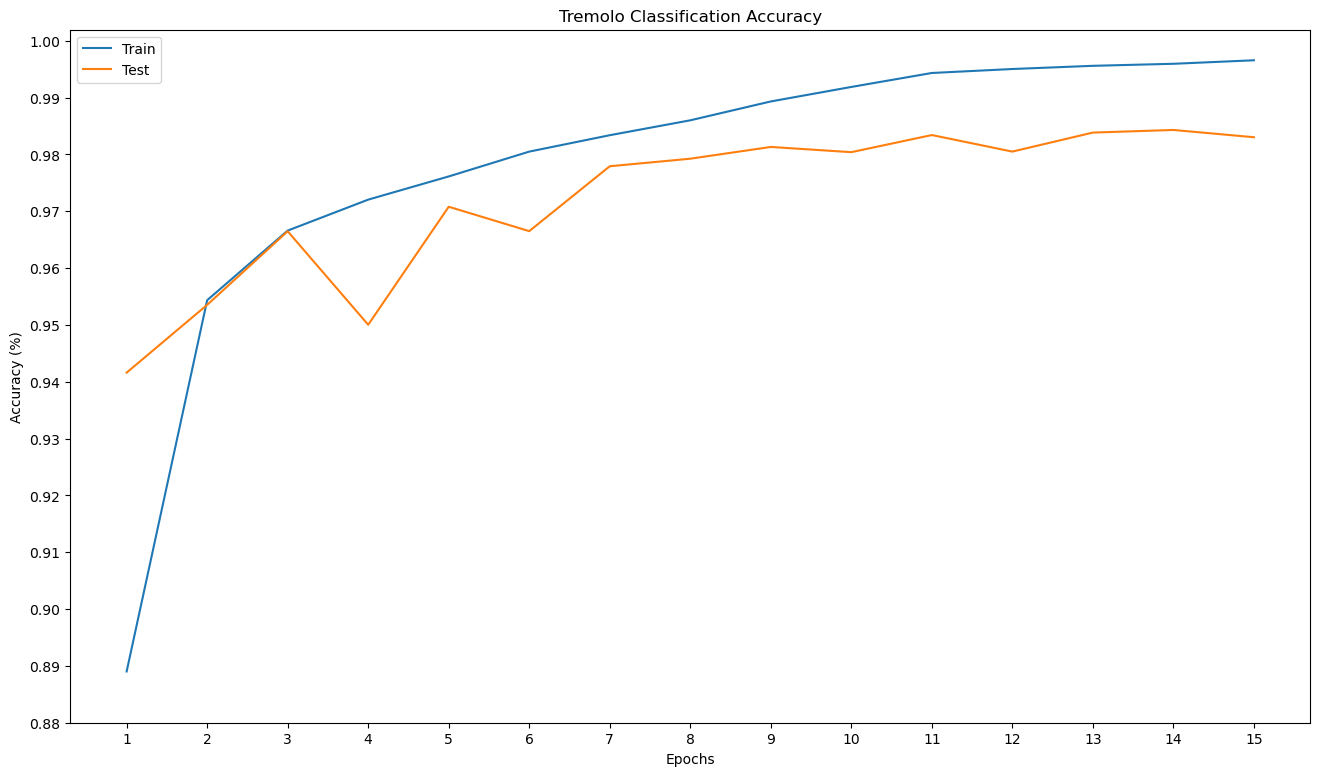

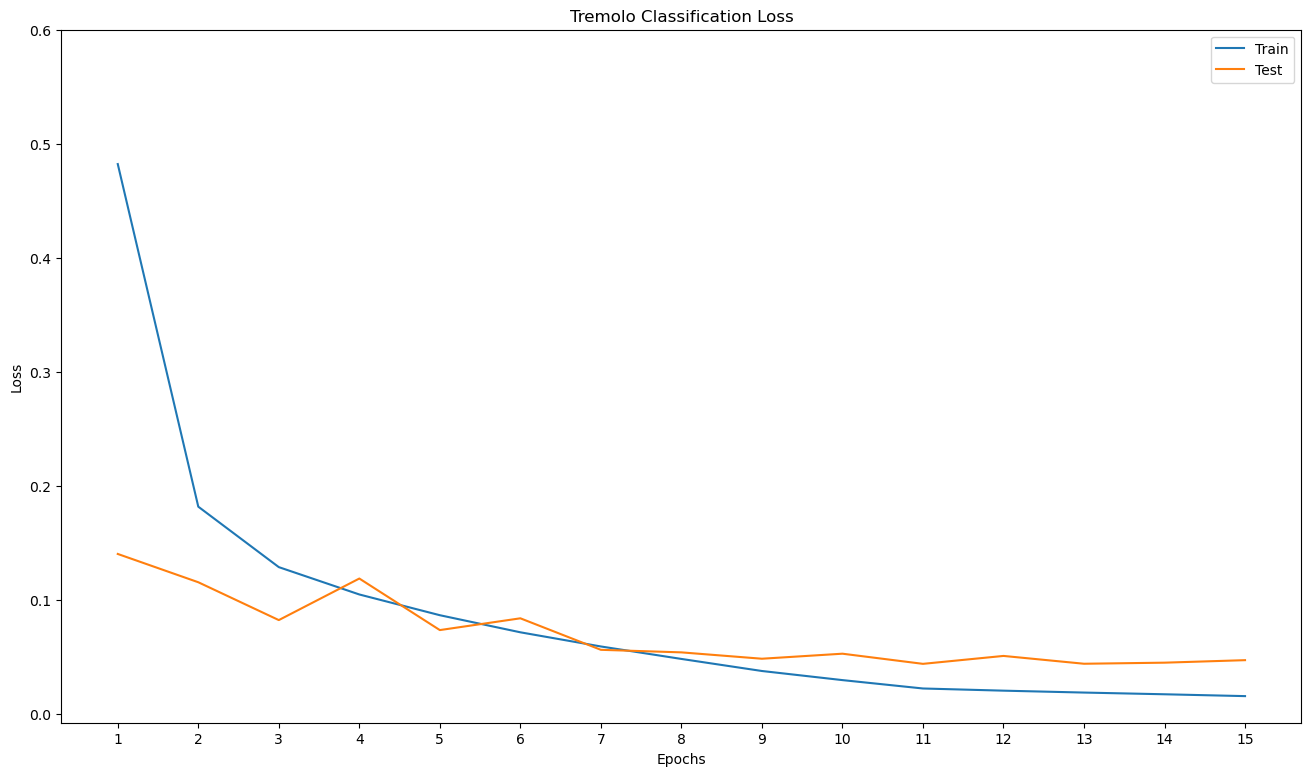

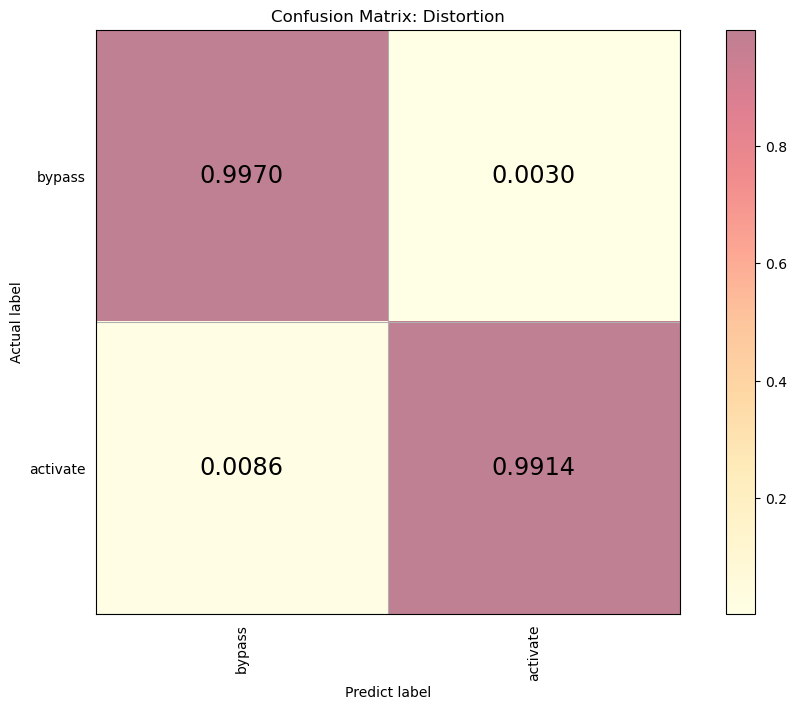

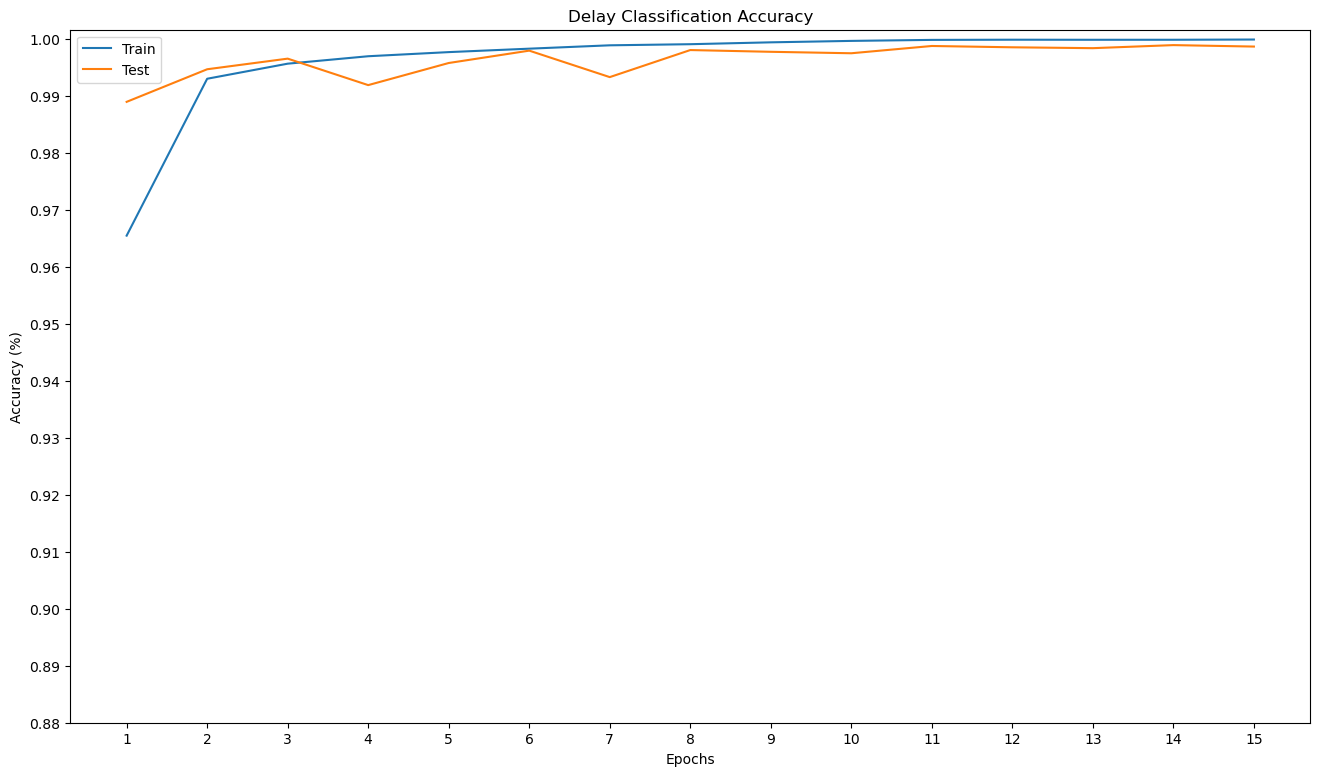

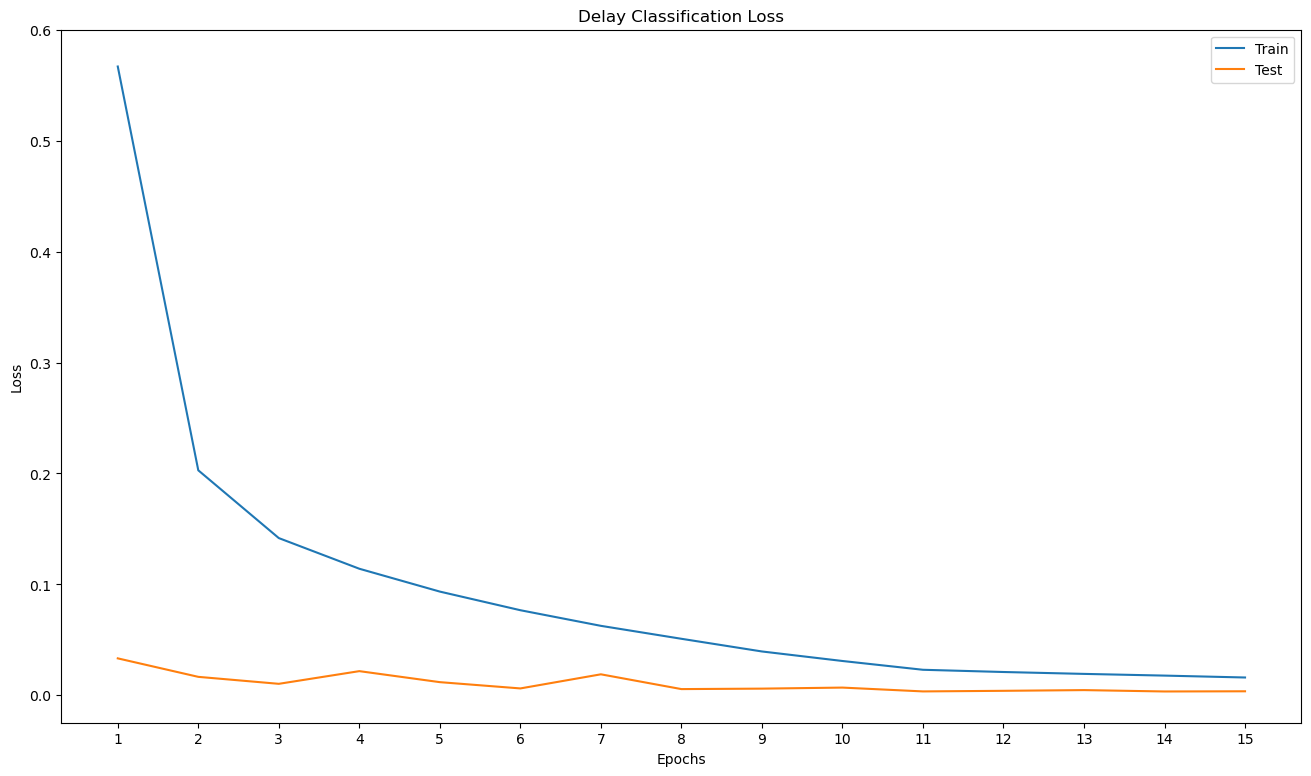

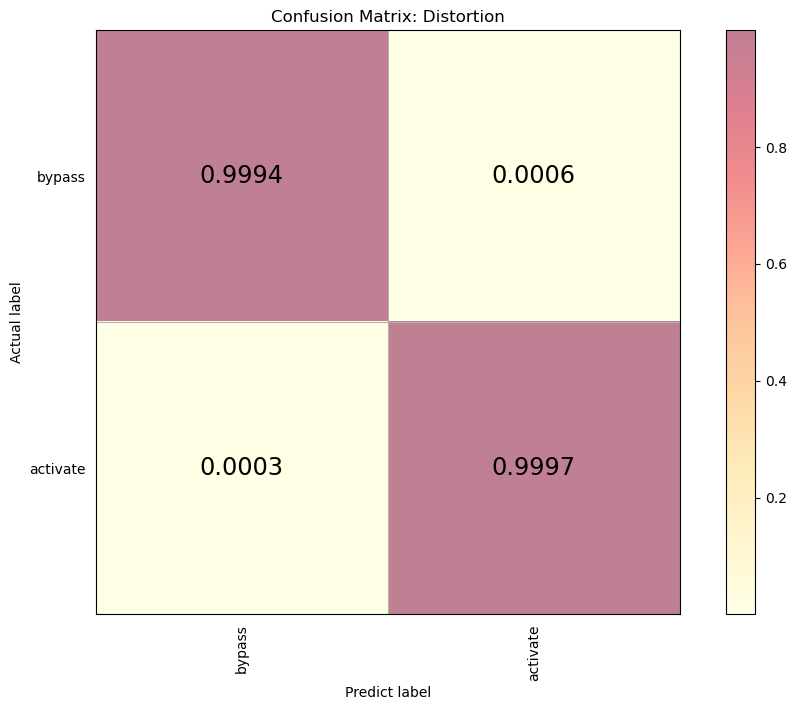

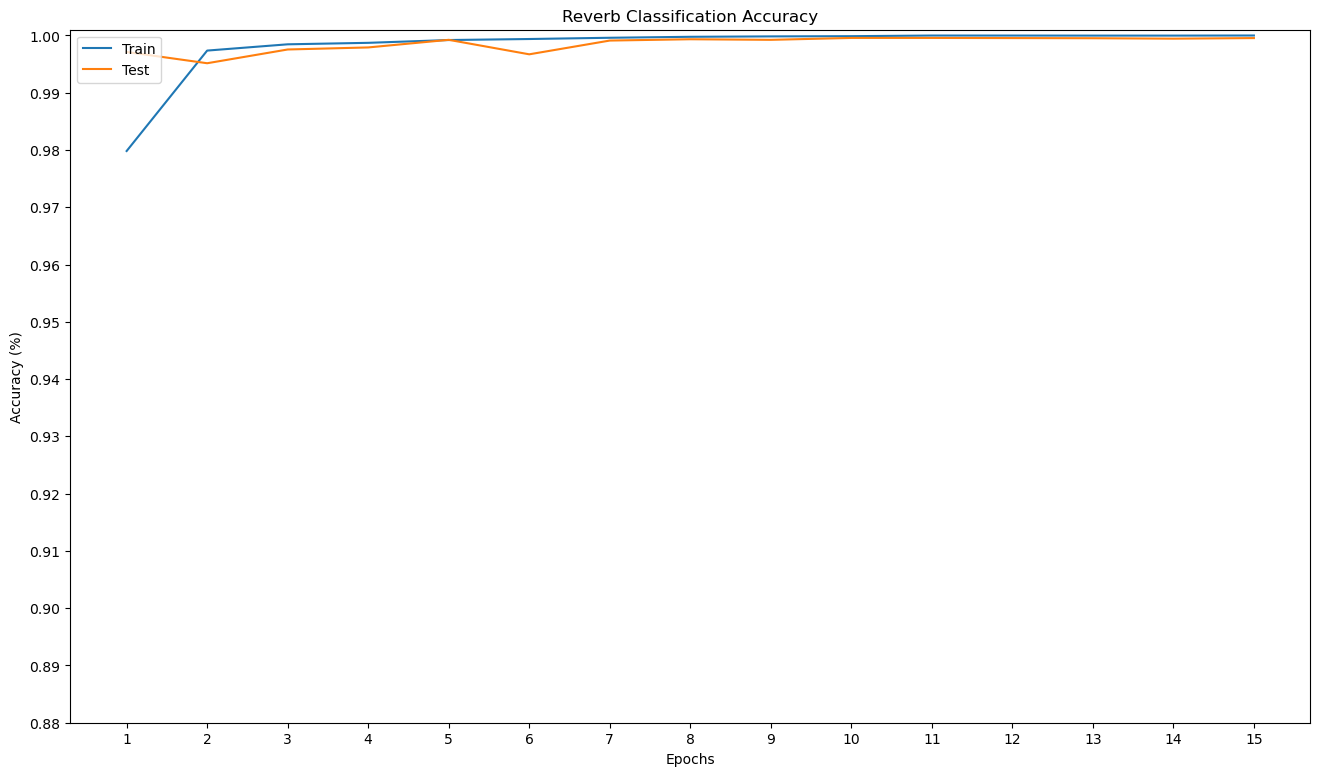

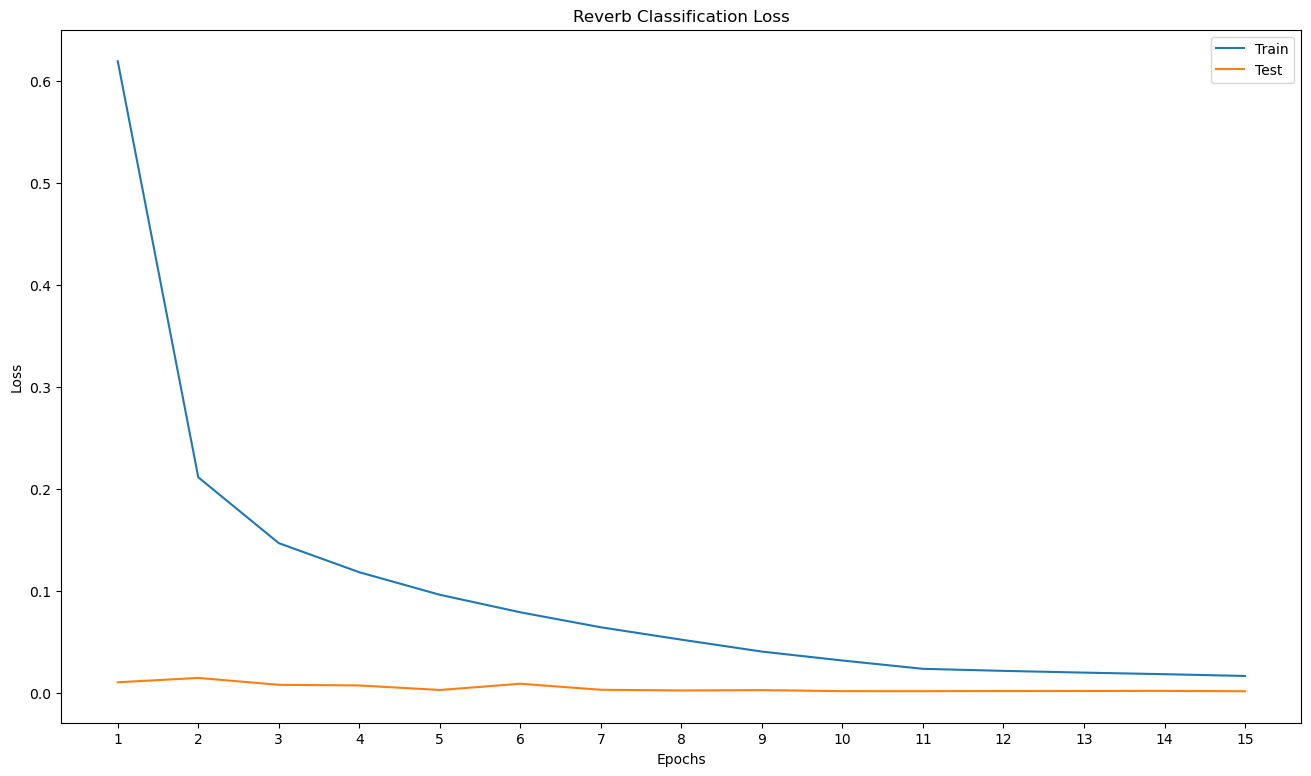

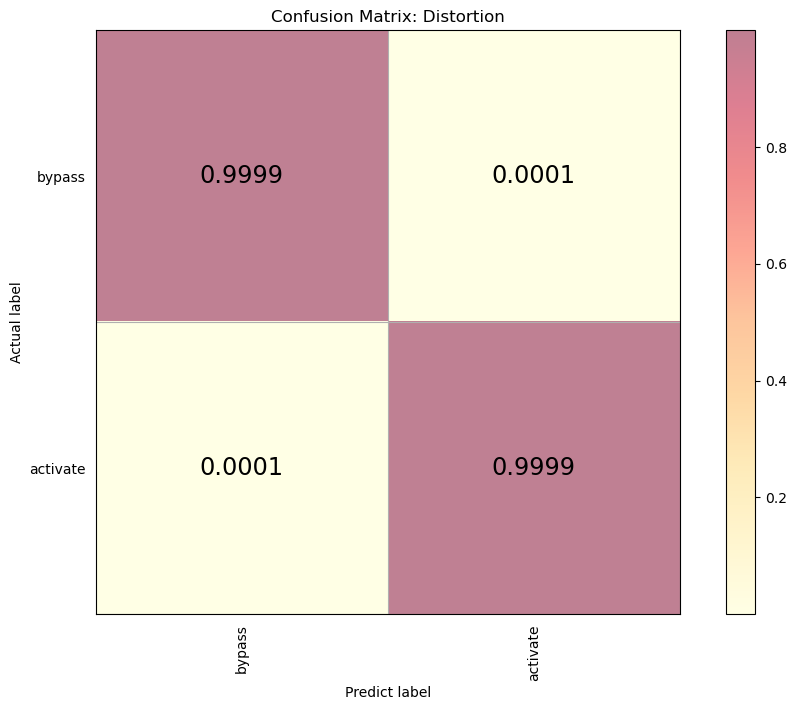

,Accuracy,Precision,Recall,F1_score
Distortion,0.9998,0.9997,1.0000,0.9999
Chorus,0.9986,0.9984,0.9990,0.9987
Tremolo,0.9940,0.9974,0.9914,0.9944
Delay,0.9996,0.9995,0.9997,0.9996
Reverb,0.9999,0.9999,0.9999,0.9999


In [3]:
TRAIN_DIR = '_log/Legacy/Training/'
EVUAL_DIR = '_log/Legacy/Evaluation/'
PLOT_DIR = '_log/Legacy/Plot/'

LABELS_ID = ['bypass', 'activate']
EFFECT_MAP = ["Distortion", "Chorus", "Tremolo", "Delay", "Reverb"]

error_list = []

for i in range(5):

    acc, loss = load_train_data(TRAIN_DIR + 'c53_classify/' + str(i) + '_')
    error = np.load(EVUAL_DIR + 'c53_classify_' + str(i) + '_evaluation.npy')

    plot_train_line(data=acc,
                    num_subplot=1,
                    subtitle=EFFECT_MAP[i] + " Classification Accuracy",
                    legend_loc='upper left',
                    x_label='Epochs',
                    y_label='Accuracy (%)',
                    x_ticks=np.arange(1, 16, 1), 
                    y_ticks=np.arange(0.88, 1.01, 0.01),
                    hight=9, 
                    width=16)

    plot_train_line(data=loss,
                    num_subplot=1,
                    subtitle=EFFECT_MAP[i] + " Classification Loss",
                    legend_loc='upper right',
                    x_label='Epochs',
                    y_label='Loss',
                    x_ticks=np.arange(1, 16, 1), 
                    y_ticks=np.arange(0, 0.7, 0.1),
                    hight=9, 
                    width=16)

    plot_confusion_matrix(confusion_matrix(y_true=error[0], y_pred=error[1]),
                                        title='Confusion Matrix: Distortion',
                                        classes=LABELS_ID)

    error_list.append(cm_score(error))

df = pd.DataFrame(error_list,
                  columns = ['Accuracy','Precision','Recall','F1_score'],
                  index = EFFECT_MAP)

df

### EX3: Parameter Extraction

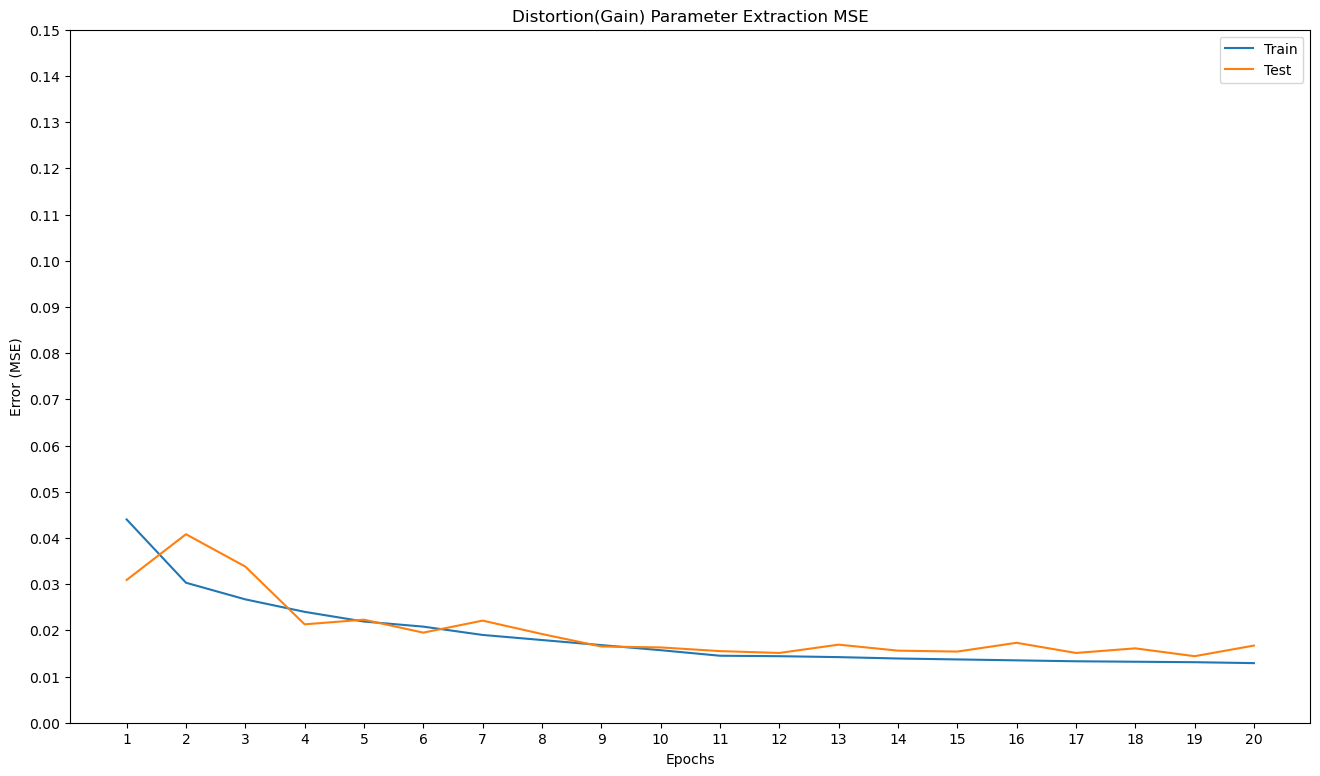

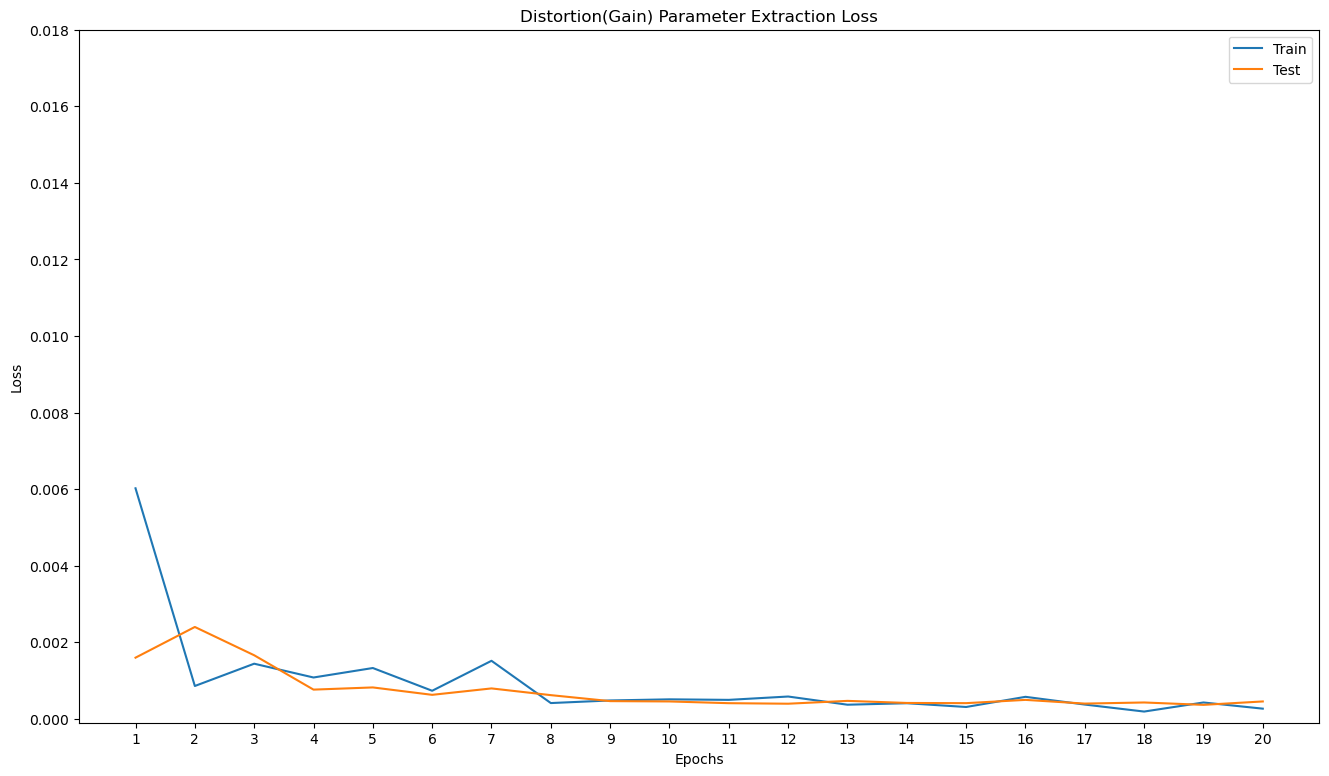

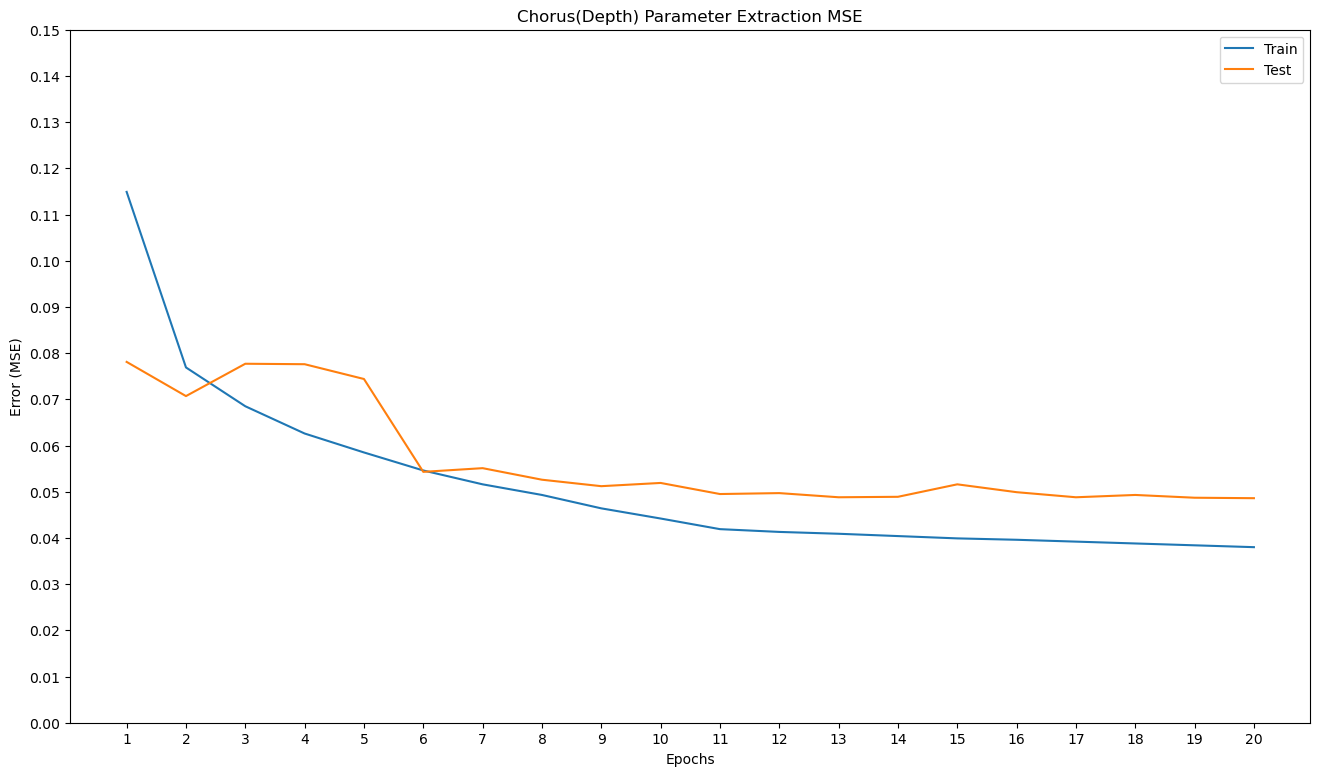

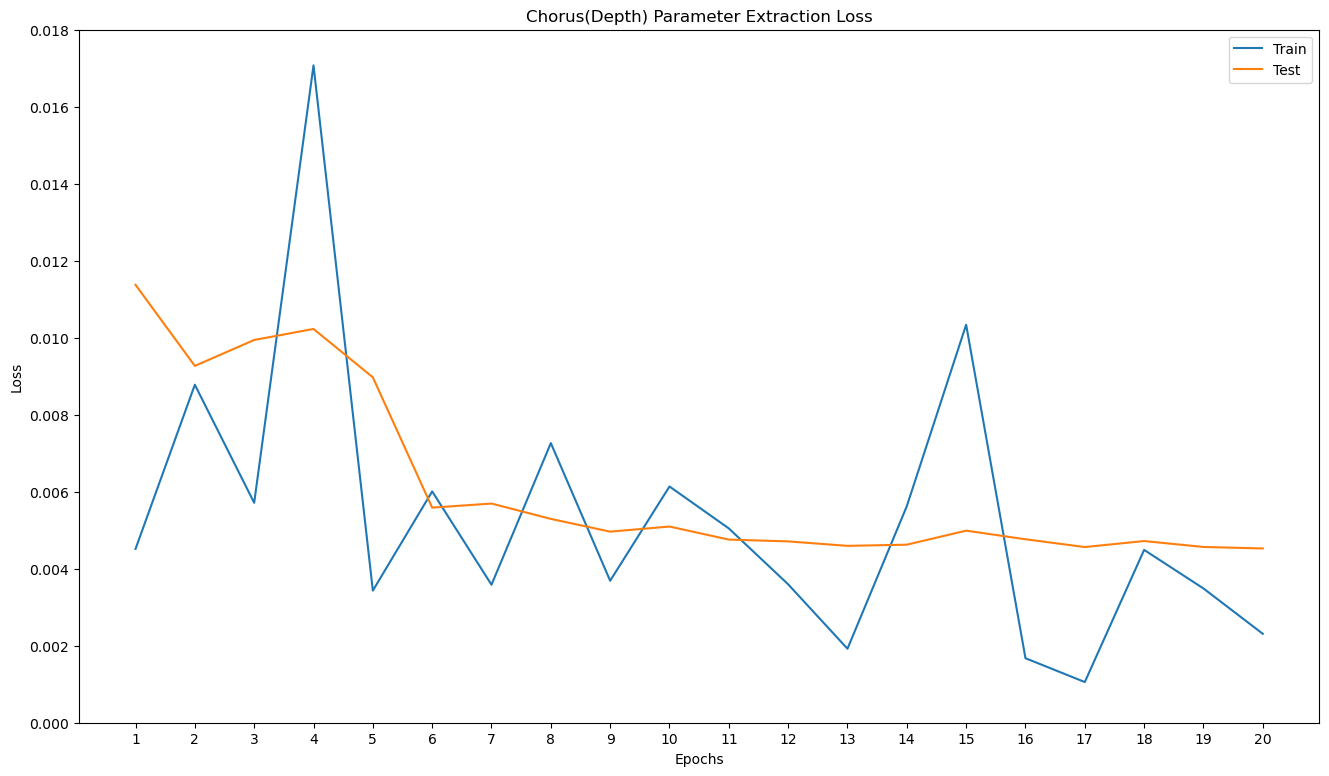

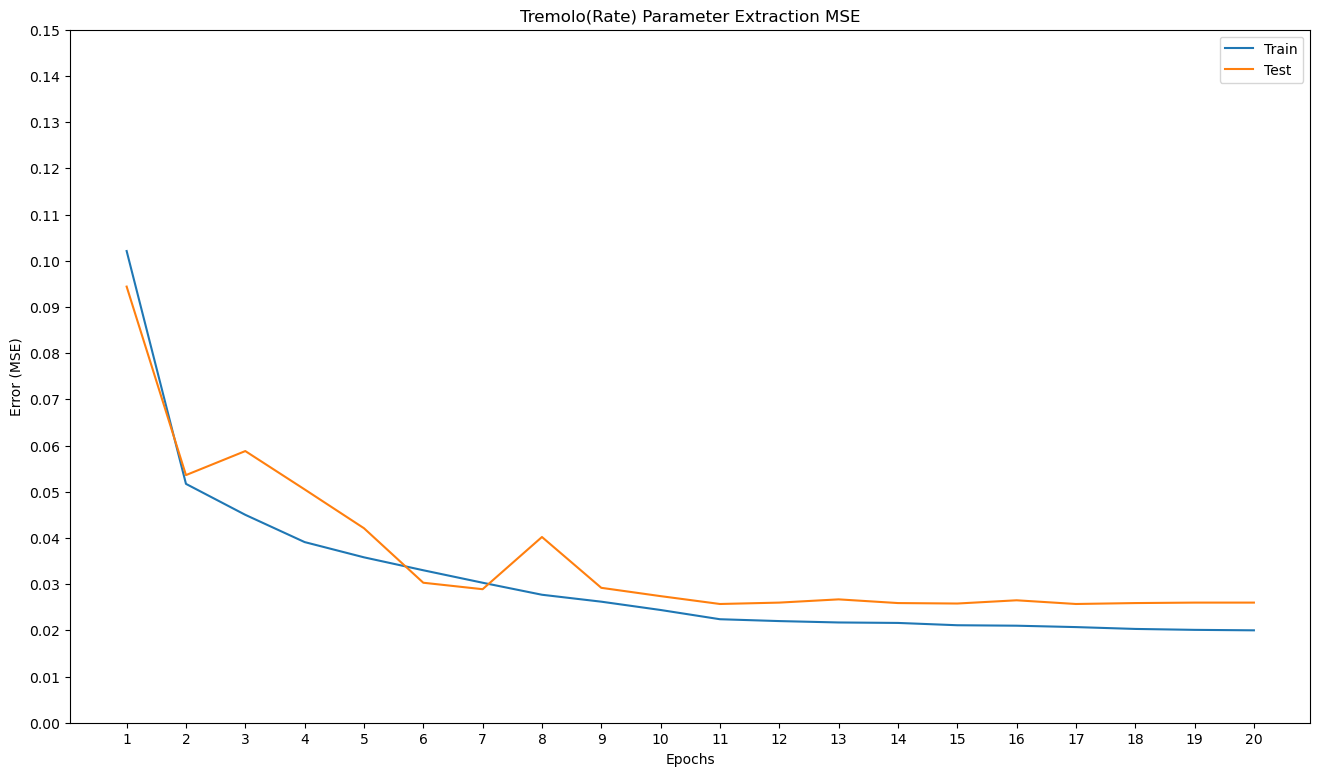

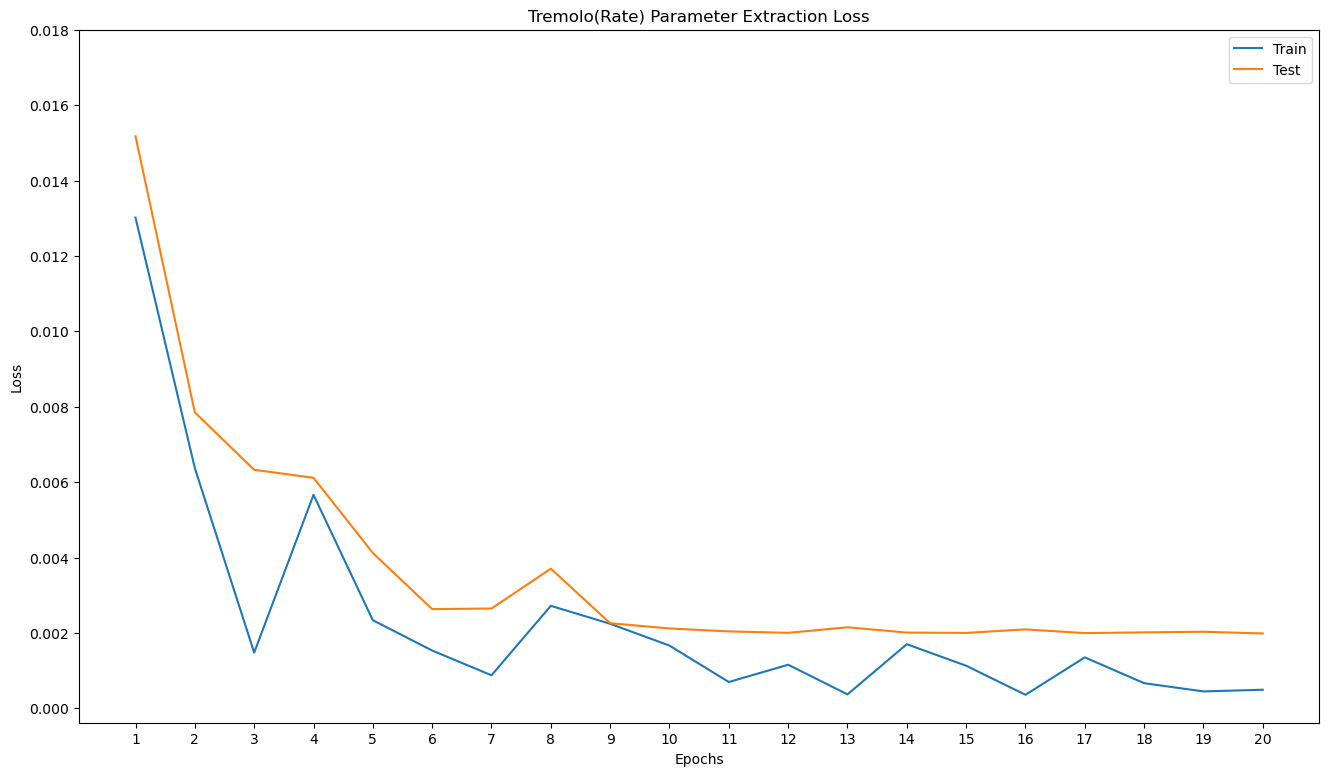

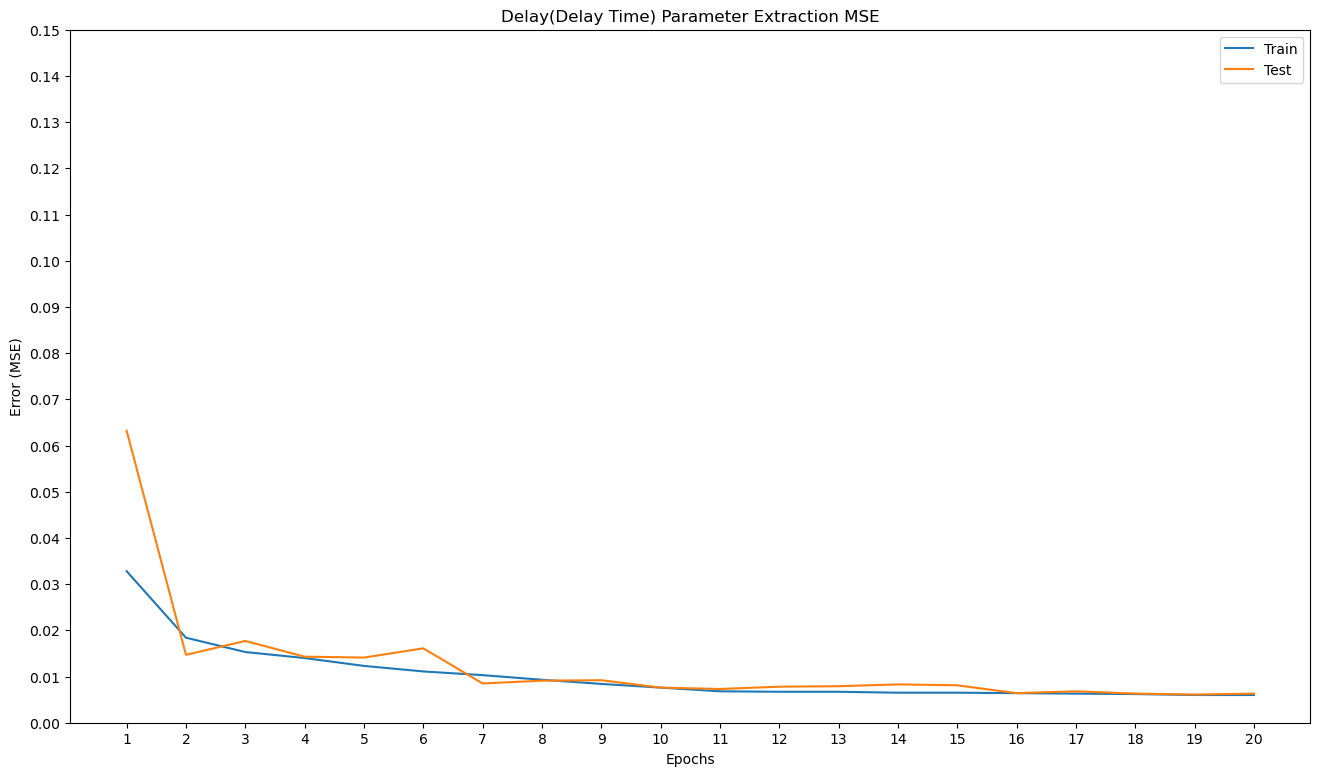

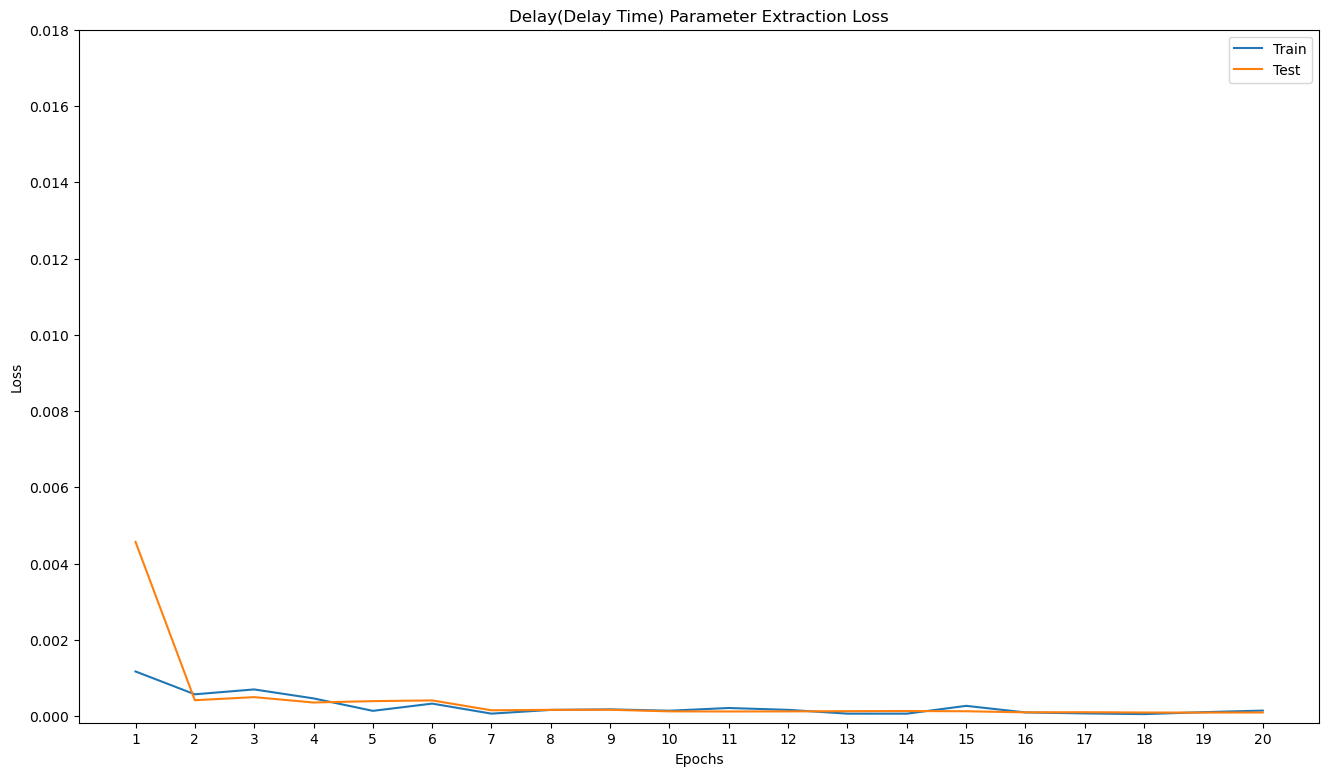

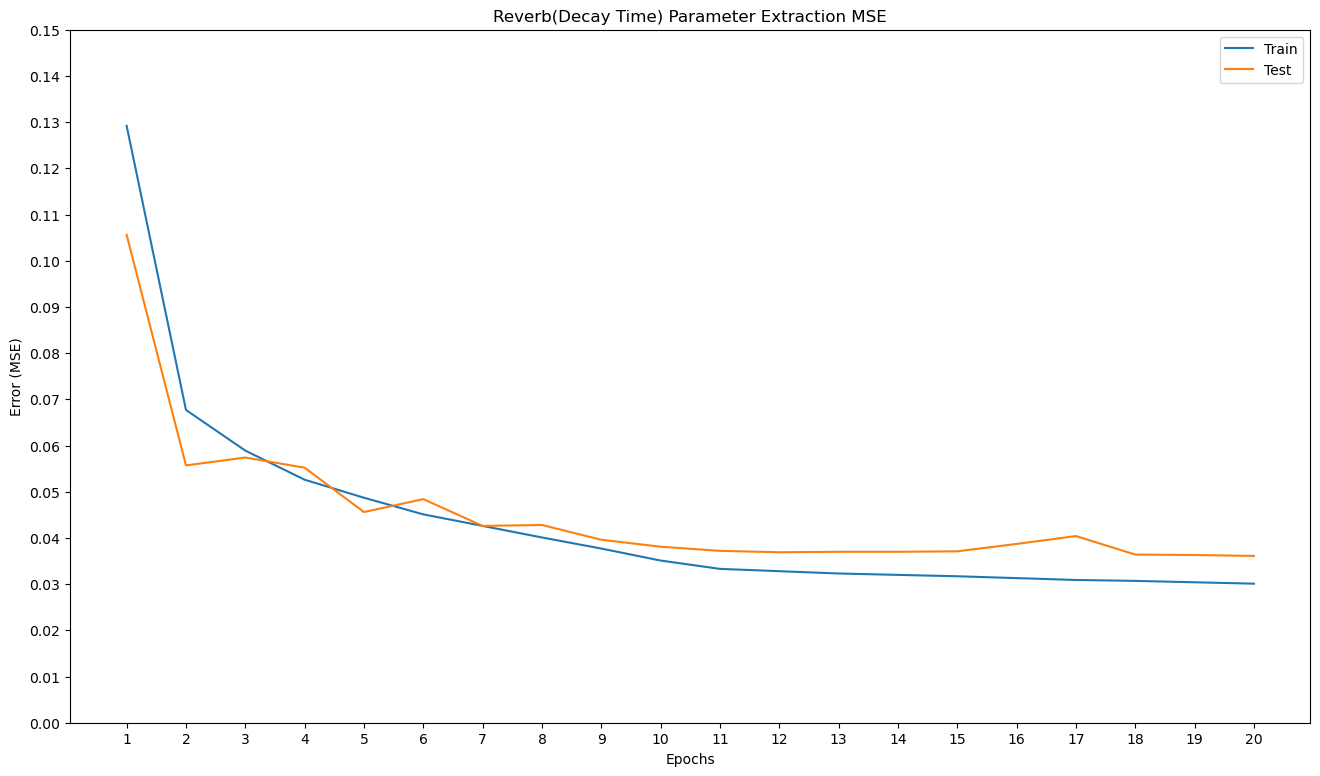

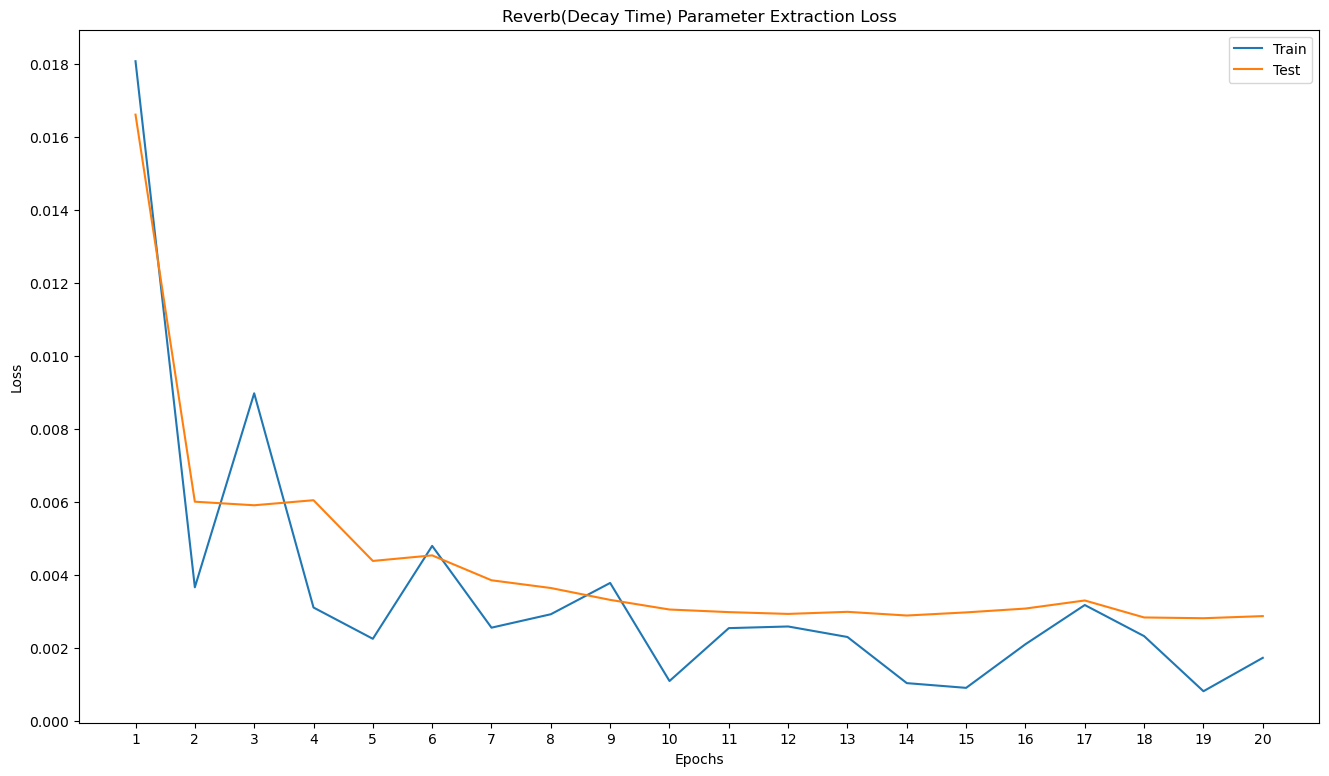

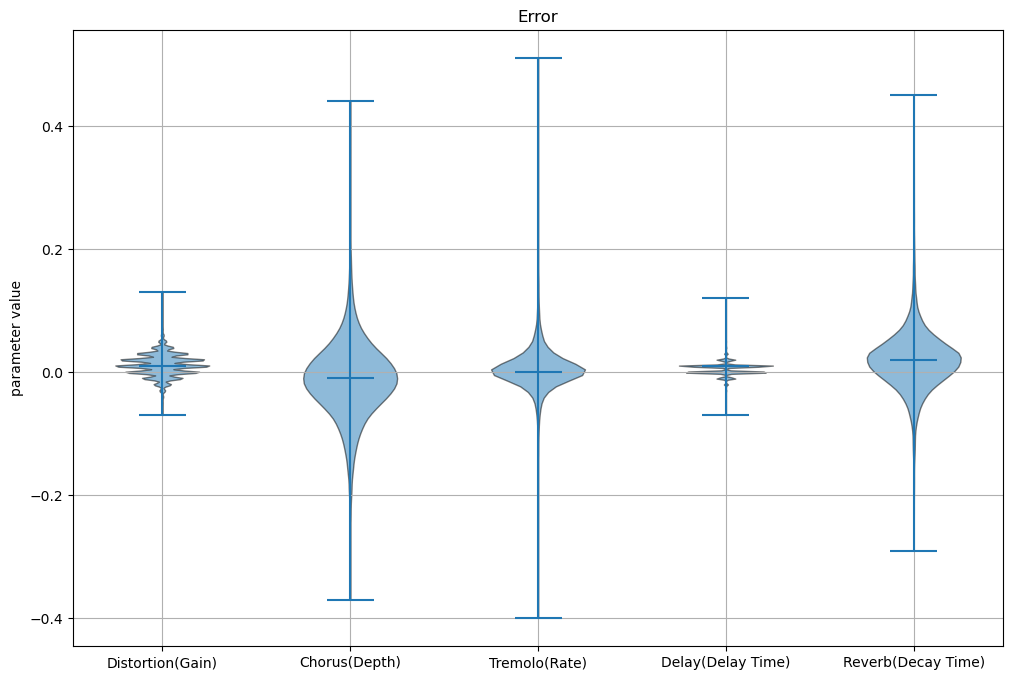

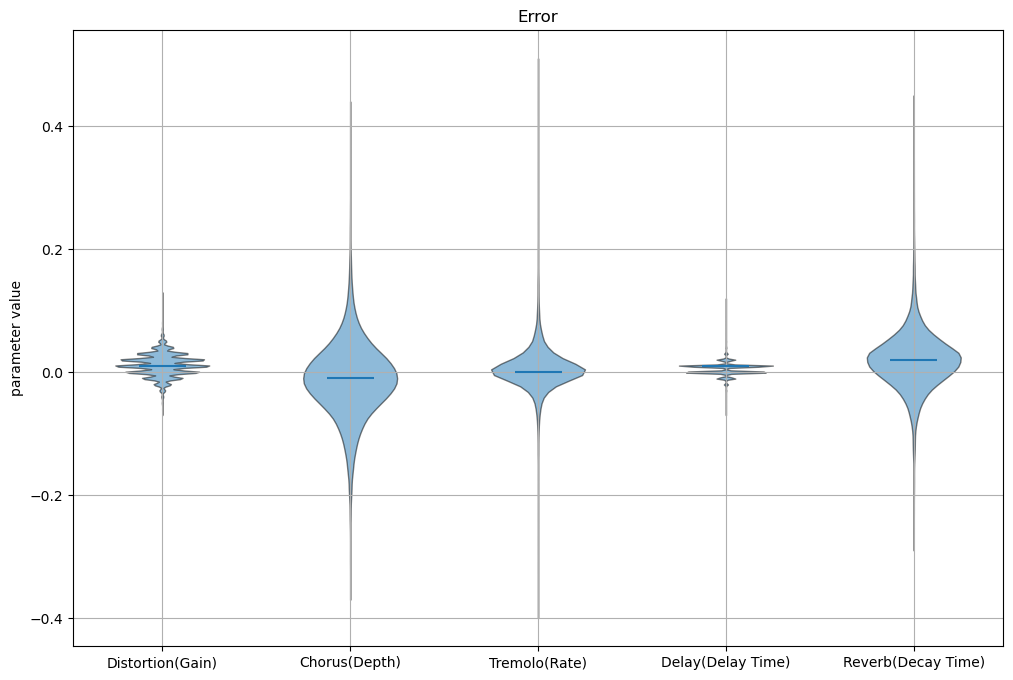

In [6]:
TRAIN_DIR = '_log/Legacy/Training/'
EVUAL_DIR = '_log/Legacy/Evaluation/'
PLOT_DIR = '_log/Legacy/Plot/'

EFFECT_MAP = ["Distortion(Gain)", "Chorus(Depth)", "Tremolo(Rate)", "Delay(Delay Time)", "Reverb(Decay Time)"]

error_list = []

for i in range(5):

    mse, loss = load_train_data_error(TRAIN_DIR + 'c53_parameter/' + str(i) + '_')
    error = np.load(EVUAL_DIR + 'c53_parameter_' + str(i) + '_evaluation.npy')

    plot_train_line(data=mse,
                    num_subplot=1,
                    subtitle=EFFECT_MAP[i] + " Parameter Extraction MSE",
                    legend_loc='upper right',
                    x_label='Epochs',
                    y_label='Error (MSE)',
                    x_ticks=np.arange(1, 21, 1), 
                    y_ticks=np.arange(0, 0.16, 0.01),
                    hight=9, 
                    width=16)

    plot_train_line(data=loss,
                    num_subplot=1,
                    subtitle=EFFECT_MAP[i] + " Parameter Extraction Loss",
                    legend_loc='upper right',
                    x_label='Epochs',
                    y_label='Loss',
                    x_ticks=np.arange(1, 21, 1), 
                    y_ticks=np.arange(0, 0.02, 0.002),
                    hight=9, 
                    width=16)

    error_list.append(error)

box = plot_violin(error_list, title="Error", labels=EFFECT_MAP, ylabel="parameter value", outlier=True)
box2 = plot_violin(error_list, title="Error", labels=EFFECT_MAP, ylabel="parameter value", outlier=False)